In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('C:\Data science\Algerian_forest_fires_cleaned_dataset.csv')



<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\shukl\AppData\Local\Temp\ipykernel_32360\81528424.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('C:\Data science\Algerian_forest_fires_cleaned_dataset.csv')


In [6]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [9]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64>

In [11]:
##Independent and dependent features
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [12]:
X.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 12), (61, 12))

In [15]:
##Feature selection based on correlation
X_train.corr

<bound method DataFrame.corr of      Unnamed: 0  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
97           97           29  74  19   0.1  75.8   3.6  32.2   2.1   5.6   
141         141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7   
192         192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4   
68           68           32  60  18   0.3  77.1  11.3  47.0   2.2  14.1   
119         119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8   
..          ...          ...  ..  ..   ...   ...   ...   ...   ...   ...   
106         106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4   
14           14           28  80  17   3.1  49.4   3.0   7.4   0.4   3.0   
92           92           25  76  17   7.2  46.0   1.3   7.5   0.2   1.8   
179         179           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5   
102         102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4   

     Classes  Region  
97         0       0  
141      

<Axes: >

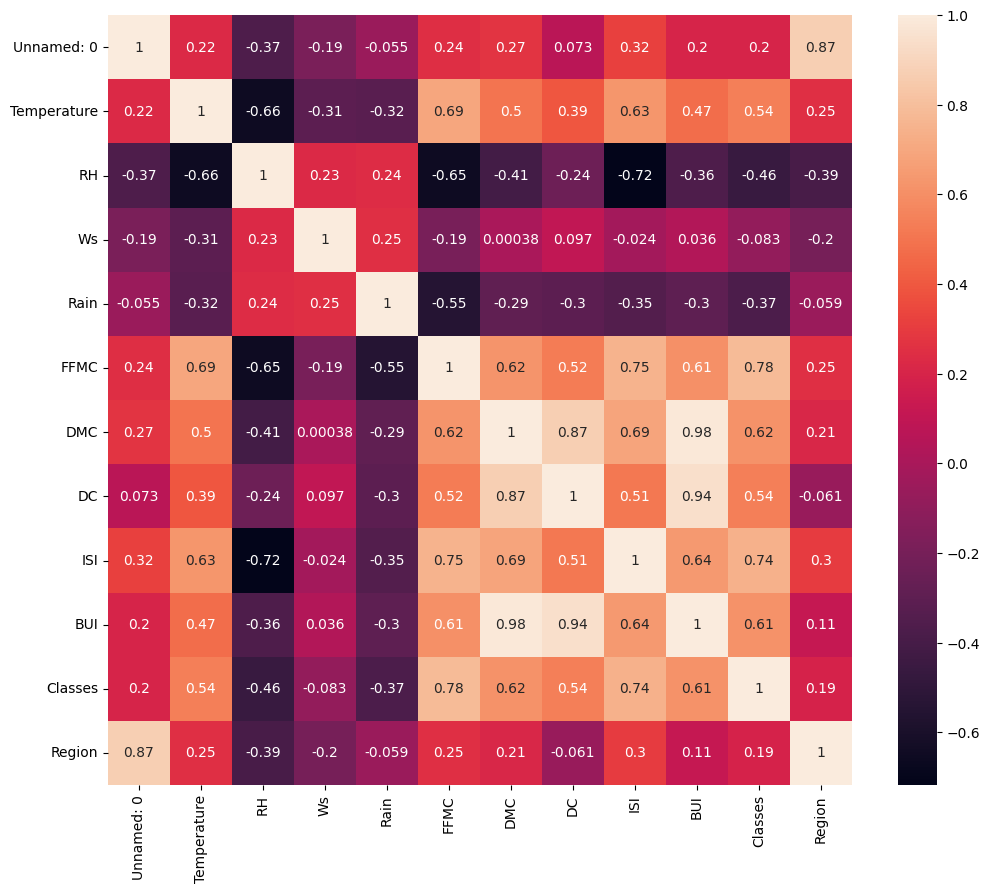

In [16]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [18]:
corr_features=correlation(X_train,0.85)

In [19]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

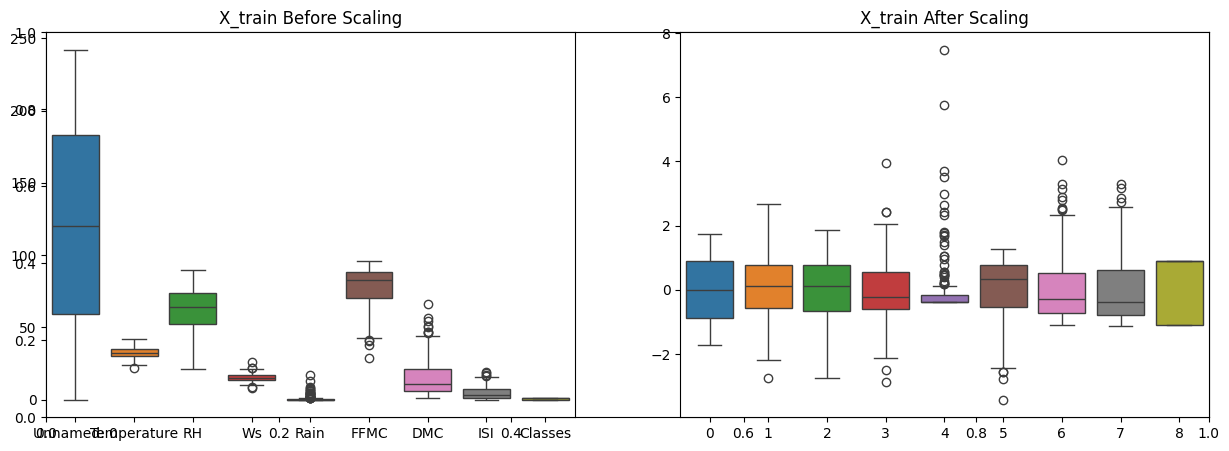

In [21]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean absolute error 0.5310423080373838
R2 Score 0.9842013874151916


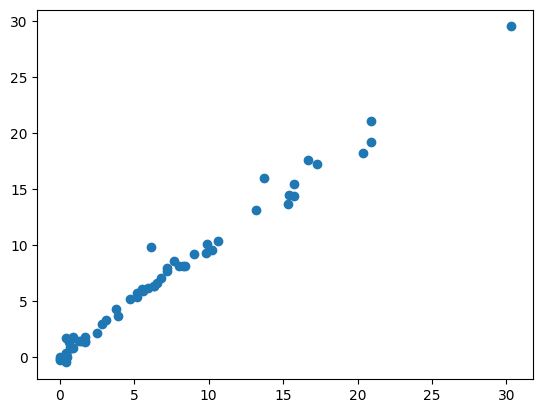

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1331797691846892
R2 Score 0.9492008839717639


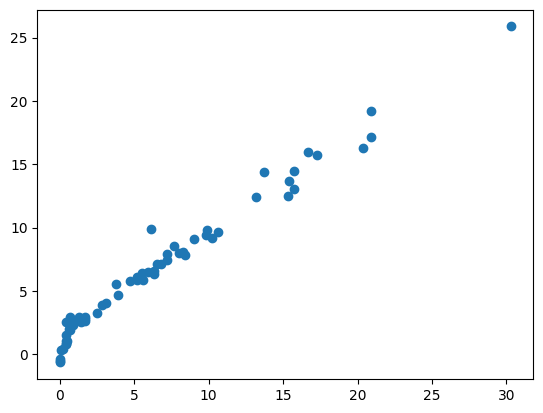

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [24]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


Mean absolute error 0.614261774677366
R2 Score 0.9813359122182632


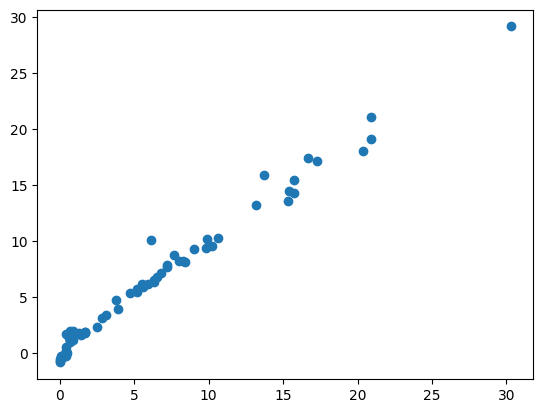

In [25]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5523063707254484
R2 Score 0.983676555604412


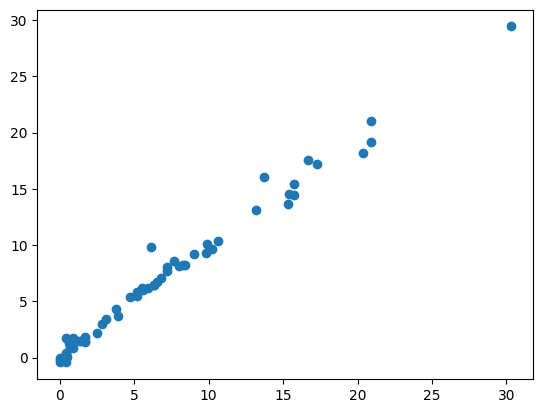

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5523063707254484
R2 Score 0.983676555604412


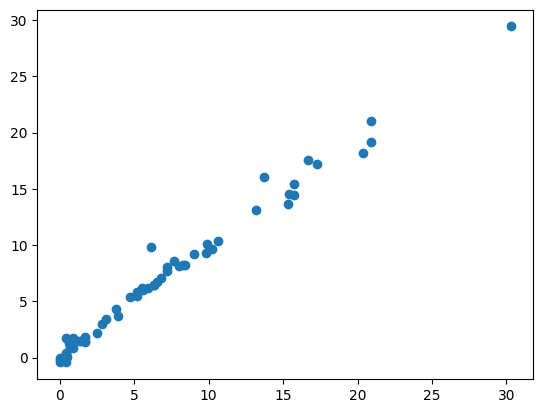

In [27]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [28]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Mean absolute error 1.8822336088419482
R2 Score 0.8753464015504889


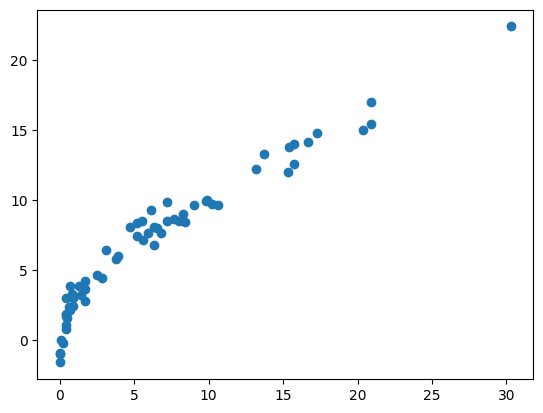

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6525416416304302
R2 Score 0.9805069854347187


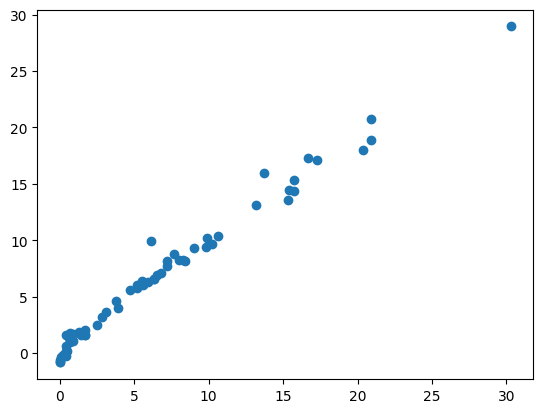

In [30]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [31]:
## Pickle the machine learning models, preprocessing model standardscaler
scaler

,copy,True
,with_mean,True
,with_std,True


In [32]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [33]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))